# WeatherPy
----

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of API calls.
* Include a print log of each city as it's being processed (with the city number and city name).
* Create DataFrame with newly aquired weather data


In [6]:
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

city_list = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
i = 0
found = True

for city in cities:
    response = requests.get(base_url + city).json()
    try:
        city_list.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
    except:
        print(f"City not found | {city.title()}")
        i = i + 1
        found = False
    if found == True:
        i = i + 1
        print(f"Processing Record {i} | {city.title()}")
    found = True

Processing Record 1 | Pevek
Processing Record 2 | Quang Ngai
Processing Record 3 | Lasa
Processing Record 4 | Isangel
Processing Record 5 | Bluff
Processing Record 6 | Kodiak
Processing Record 7 | Rikitea
Processing Record 8 | Kununurra
Processing Record 9 | Shwebo
Processing Record 10 | Fortuna
Processing Record 11 | Gat
Processing Record 12 | Yellowknife
Processing Record 13 | Sitka
Processing Record 14 | Poronaysk
Processing Record 15 | Quatre Cocos
Processing Record 16 | Qaqortoq
Processing Record 17 | Komsomolskiy
Processing Record 18 | Lilongwe
Processing Record 19 | Atuona
Processing Record 20 | Port Alfred
City not found | Samusu
Processing Record 22 | Provideniya
Processing Record 23 | Bathsheba
Processing Record 24 | San Patricio
Processing Record 25 | Ushuaia
Processing Record 26 | Chuy
Processing Record 27 | Cabedelo
Processing Record 28 | Jodhpur
Processing Record 29 | Namibe
Processing Record 30 | Punta Arenas
Processing Record 31 | Port Lincoln
City not found | Amderma
P

Processing Record 255 | Winder
Processing Record 256 | Rocha
Processing Record 257 | Abu Dhabi
Processing Record 258 | Avera
Processing Record 259 | Tranas
Processing Record 260 | Russell
Processing Record 261 | Meulaboh
Processing Record 262 | Klaksvik
Processing Record 263 | Olinda
Processing Record 264 | Sao Domingos
Processing Record 265 | Rozkishne
Processing Record 266 | Los Llanos De Aridane
Processing Record 267 | Half Moon Bay
Processing Record 268 | Zaritap
Processing Record 269 | Makinsk
Processing Record 270 | Bandarbeyla
Processing Record 271 | Manta
Processing Record 272 | Ballina
Processing Record 273 | Yarmouth
Processing Record 274 | Chacabuco
Processing Record 275 | Votkinsk
Processing Record 276 | Surt
Processing Record 277 | Strezhevoy
Processing Record 278 | Burnie
Processing Record 279 | Megion
Processing Record 280 | Constitucion
Processing Record 281 | Lima
Processing Record 282 | Brae
Processing Record 283 | Geraldton
Processing Record 284 | Byron Bay
Processin

Processing Record 505 | Yokadouma
City not found | Vaitupu
Processing Record 507 | Amasya
Processing Record 508 | Fairview
Processing Record 509 | Kloulklubed
Processing Record 510 | Fairbanks
Processing Record 511 | Lazaro Cardenas
Processing Record 512 | Padre Bernardo
Processing Record 513 | The Pas
Processing Record 514 | Bengkulu
Processing Record 515 | Havoysund
Processing Record 516 | Gurupi
Processing Record 517 | Atherton
Processing Record 518 | Palmer
Processing Record 519 | Port Hedland
Processing Record 520 | Krasnoselkup
Processing Record 521 | Bundaberg
Processing Record 522 | Channel-Port Aux Basques
City not found | Ji-Parana
Processing Record 524 | Batavia
City not found | Ouranopolis
Processing Record 526 | Hualmay
Processing Record 527 | Pierre
Processing Record 528 | Nayoro
Processing Record 529 | Kupang
Processing Record 530 | Dalmatovo
Processing Record 531 | Nuuk
Processing Record 532 | Palana
Processing Record 533 | Kazanskoye
Processing Record 534 | Balabac
Pro

In [7]:
data = {
    "City":city_list,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}
df = pd.DataFrame(data)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.70,170.31,54.82,66,89,9.44,RU,1595802360
1,Quang Ngai,15.12,108.80,75.87,87,8,4.29,VN,1595802496
2,Laas,46.62,10.70,57.99,93,51,3.36,IT,1595802496
3,Isangel,-19.55,169.27,77.00,83,40,11.41,VU,1595802273
4,Bluff,-46.60,168.33,39.00,83,0,3.00,NZ,1595802229


### Export the city data into a .csv file.
* Display the new dataframe's count for comparison with the length of cities list

In [8]:
df.to_csv("../Outputs/WeatherPy/Raw_Data.csv")
df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
* No cities have humidity > 100%

In [9]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,21.217904,16.436323,68.942948,72.381883,47.618117,7.983517,1.595802e+09
std,33.164401,91.776632,13.823592,18.887327,38.691749,5.635685,1.432592e+02
min,-54.800000,-179.170000,33.800000,10.000000,0.000000,0.270000,1.595802e+09
25%,-6.100000,-68.975000,58.025000,62.500000,4.000000,4.000000,1.595802e+09
50%,26.540000,24.730000,70.000000,77.000000,40.000000,6.730000,1.595803e+09
75%,49.265000,99.250000,79.180000,87.000000,89.000000,10.920000,1.595803e+09
max,78.220000,179.320000,102.000000,100.000000,100.000000,58.000000,1.595803e+09


## Latitude vs. Temperature Plot

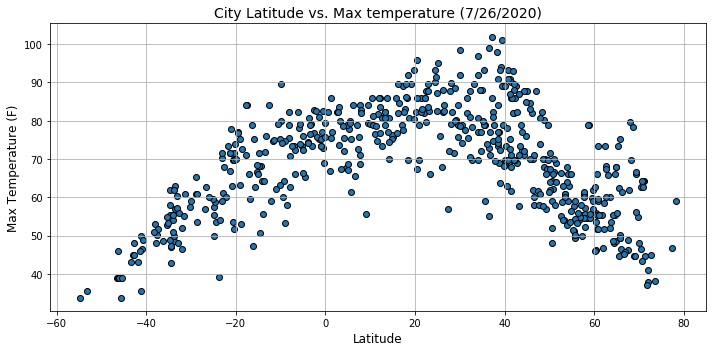

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(df["Lat"],df["Max Temp"],edgecolors="black")
plt.title("City Latitude vs. Max temperature (7/26/2020)",size=14)
plt.ylabel("Max Temperature (F)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Lat vs. Temp Scatter Plot.png")

**Code Breakdown:** This code plots Latitude vs. Max Temperature (on 7/26/2020) for the entire population of randomly selected cities <br>
**Figure Analysis:** As latitude nears it's max and min values, temperature nears it's lowest value.

## Latitude vs. Humidity Plot

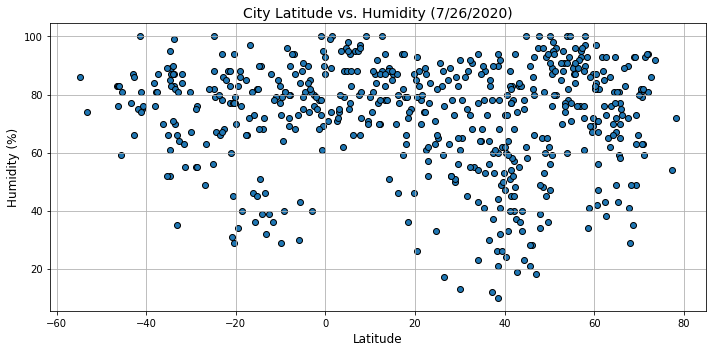

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(df["Lat"],df["Humidity"],edgecolors="black")
plt.title("City Latitude vs. Humidity (7/26/2020)",size=14)
plt.ylabel("Humidity (%)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Lat vs. Humidity Scatter Plot.png")

**Code Breakdown:** This code plots Latitude vs. Humidity (on 7/26/2020) for the entire population of randomly selected cities. <br>
**Figure Analysis:** Latitude does not seem to be a good predictor of Humidity.

## Latitude vs. Cloudiness Plot

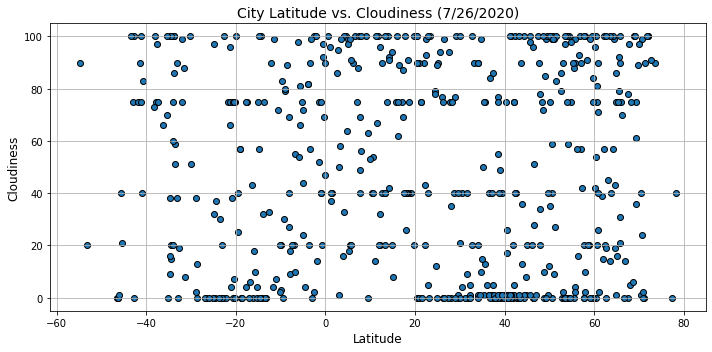

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(df["Lat"],df["Cloudiness"],edgecolors="black")
plt.title("City Latitude vs. Cloudiness (7/26/2020)",size=14)
plt.ylabel("Cloudiness",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Lat vs. Cloudiness Scatter Plot.png")

**Code Breakdown:** This code plots Latitude vs. Cloudiness (on 7/26/2020) for the entire population of randomly selected cities. <br>
**Figure Analysis:** Latitude does not seem to be a good predictor of Cloudiness.

## Latitude vs. Wind Speed Plot

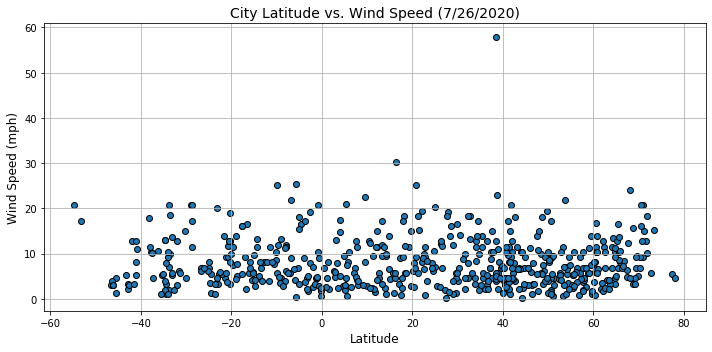

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(df["Lat"],df["Wind Speed"],edgecolors="black")
plt.title("City Latitude vs. Wind Speed (7/26/2020)",size=14)
plt.ylabel("Wind Speed (mph)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Lat vs. Wind Speed Scatter Plot.png")

**Code Breakdown:** This code plots Latitude vs. Wind Speed (on 7/26/2020) for the entire population of randomly selected cities. <br>
**Figure Analysis:** Latitude does not seem to be a good predictor of Wind Speed. An outlier city was experiencing extremely high wind at time of review.

## Linear Regression

In [14]:
# Creating a function to create Linear Regression plots
def plot_lin(x, y):
    slope, intercept, rvalue, pvalue, std = linregress(x,y)
    line = (slope * x) + intercept
    plt.plot(x,line, linewidth=3,color="r")
    print(f"The r-squared is: {rvalue}")

In [15]:
# Creating Northern and Southern Hemisphere DataFrames
north_df = df.loc[df["Lat"]>0,:]
south_df = df.loc[df["Lat"]<=0,:]

print(len(north_df))
print(len(south_df))
north_df.head()

392
171


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.70,170.31,54.82,66,89,9.44,RU,1595802360
1,Quang Ngai,15.12,108.80,75.87,87,8,4.29,VN,1595802496
2,Laas,46.62,10.70,57.99,93,51,3.36,IT,1595802496
5,Saint Paul Harbor,57.79,-152.41,60.80,72,20,10.29,US,1595802402
8,Shwebo,22.57,95.70,79.65,87,99,6.60,MM,1595802498


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.641571820908026


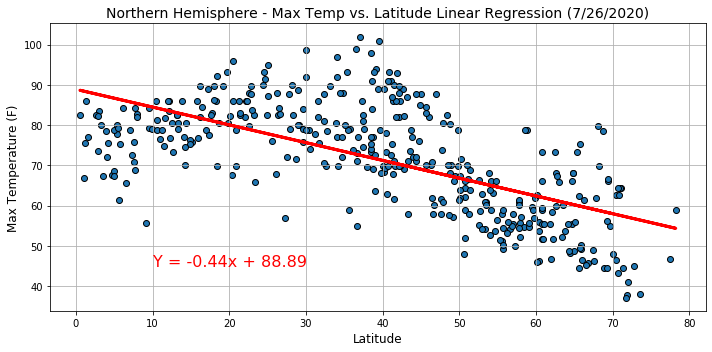

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(north_df["Lat"],north_df["Max Temp"],edgecolors="black")
plot_lin(north_df["Lat"],north_df["Max Temp"])
values = linregress(north_df["Lat"],north_df["Max Temp"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(10,45),color="r",size=16)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Max Temperature (F)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Northern Hemisphere: Lat vs. Temp Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8266309374597661


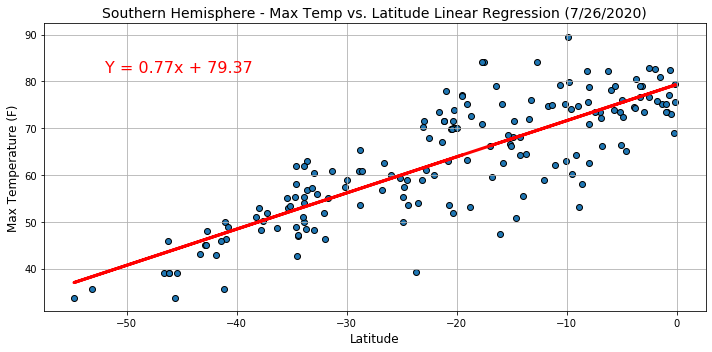

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(south_df["Lat"],south_df["Max Temp"],edgecolors="black")
plot_lin(south_df["Lat"],south_df["Max Temp"])
values = linregress(south_df["Lat"],south_df["Max Temp"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(-52,82),color="r",size=16)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Max Temperature (F)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Southern Hemisphere: Lat vs. Temp Linear Regression.png")

**Analysis**: Using Latitude to predict temperature in the Southern Hemisphere will provide a more accurate result than predicting temperature in the Northern Hemisphere. On average, as Latitude nears zero, temperatures move higher.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.0814597926480565


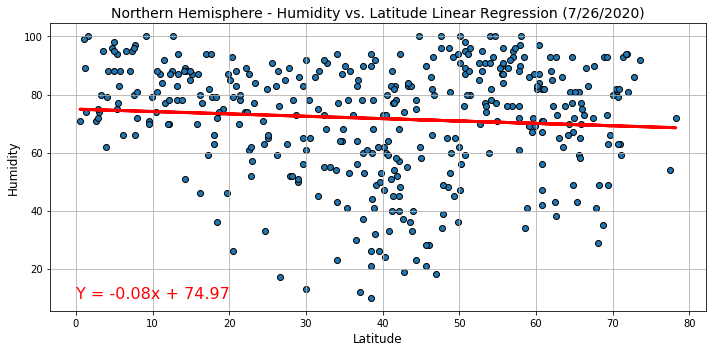

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(north_df["Lat"],north_df["Humidity"],edgecolors="black")
plot_lin(north_df["Lat"],north_df["Humidity"])
values = linregress(north_df["Lat"],north_df["Humidity"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(0,10),color="r",size=16)
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Humidity",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Northern Hemisphere: Lat vs. Humidity Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.05704070558443589


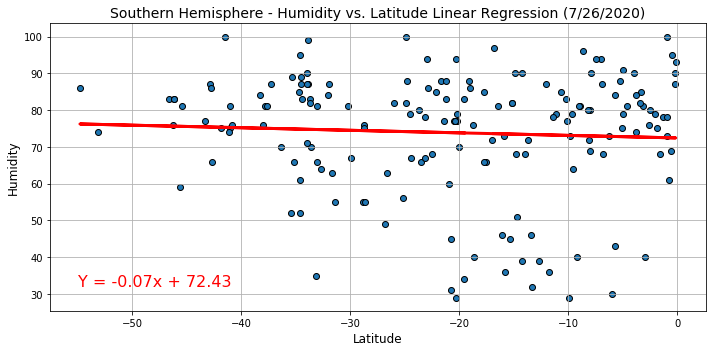

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(south_df["Lat"],south_df["Humidity"],edgecolors="black")
plot_lin(south_df["Lat"],south_df["Humidity"])
values = linregress(south_df["Lat"],south_df["Humidity"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(-55,32),color="r",size=16)
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Humidity",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Southern Hemisphere: Lat vs. Humidity Linear Regression.png")

**Analysis**: Latitude is a poor predictor of Humidity. It is safe to conclude the two variables are not correlated. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.06416033602336274


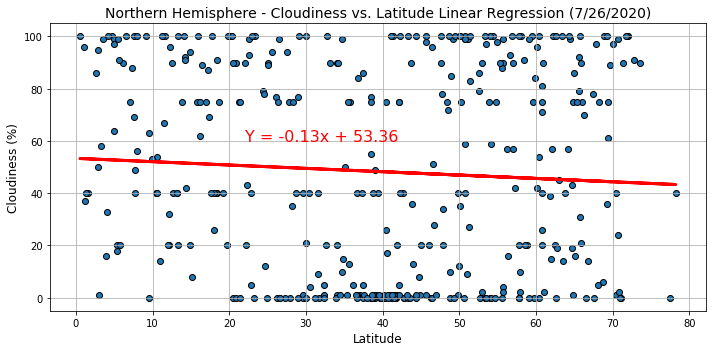

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(north_df["Lat"],north_df["Cloudiness"],edgecolors="black")
plot_lin(north_df["Lat"],north_df["Cloudiness"])
values = linregress(north_df["Lat"],north_df["Cloudiness"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(22,60),color="r",size=16)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Cloudiness (%)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Northern Hemisphere: Lat vs. Cloudiness Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.017983442040568325


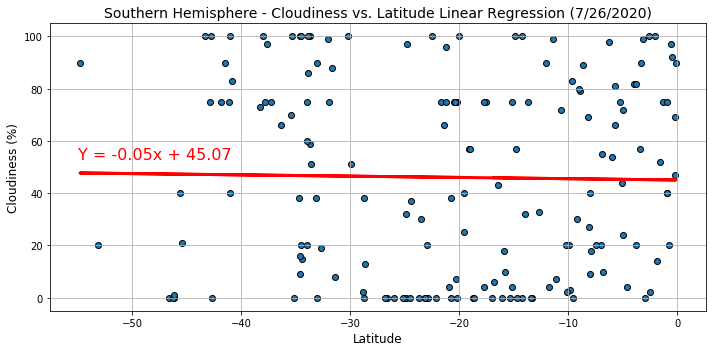

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(south_df["Lat"],south_df["Cloudiness"],edgecolors="black")
plot_lin(south_df["Lat"],south_df["Cloudiness"])
values = linregress(south_df["Lat"],south_df["Cloudiness"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(-55,53),color="r",size=16)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Cloudiness (%)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Southern Hemisphere: Lat vs. Cloudiness Linear Regression.png")

**Analysis**: Latitude is a poor predictor of Cloudiness. The two variables have a very low correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0030811614628861142


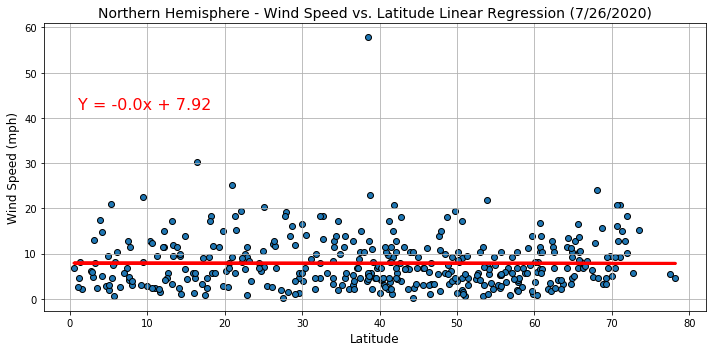

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(north_df["Lat"],north_df["Wind Speed"],edgecolors="black")
plot_lin(north_df["Lat"],north_df["Wind Speed"])
values = linregress(north_df["Lat"],north_df["Wind Speed"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(1,42),color="r",size=16)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Wind Speed (mph)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Northern Hemisphere: Lat vs. Wind Speed Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008792286636042902


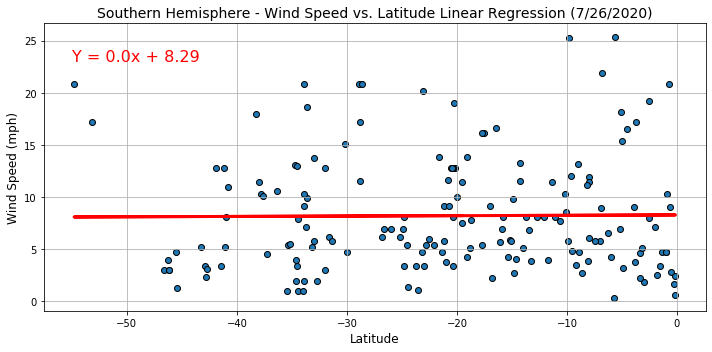

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(south_df["Lat"],south_df["Wind Speed"],edgecolors="black")
plot_lin(south_df["Lat"],south_df["Wind Speed"])
values = linregress(south_df["Lat"],south_df["Wind Speed"])
plt.annotate(f"Y = {round(values[0],2)}x + {round(values[1],2)}",(-55,23),color="r",size=16)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression (7/26/2020)",size=14)
plt.ylabel("Wind Speed (mph)",size=12)
plt.xlabel("Latitude",size=12)
plt.grid()
plt.tight_layout()
plt.savefig("../Outputs/WeatherPy/Southern Hemisphere: Lat vs. Wind Speed Linear Regression.png")

**Analysis**: Latitude is a poor predictor of Wind Speed. The two variables have a very low correlation.